In [42]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Investigate the taxonomic profile of the reads

In [72]:
full_dict={}

#for each sample file, create dictionaries of species:frequency
for filepath in glob.iglob('KRAKEN/SRR*.kraken'):
    name=filepath[14:16]
    sample_dict={}
    tax=open(filepath)
    for line in tax:
        split_tax=line.split(';')
        try:
            species=split_tax[-2]
            sample_dict.setdefault(species,0)
            sample_dict[species]+=1
        except IndexError:
            pass
    full_dict[name]=sample_dict
    tax.close()

In [73]:
full_df=pd.DataFrame(full_dict)
full_df

,93,83,89,97,90,86,94,88
Enterococcus,950527.0,772803.0,1077333.0,686554.0,954813.0,1100004.0,822373.0,1057359.0
Enterococcus faecalis,306181.0,254787.0,352765.0,264524.0,317872.0,380280.0,264335.0,379556.0
Cutibacterium avidum,46295.0,277301.0,29.0,435887.0,184.0,62.0,47327.0,152.0
Staphylococcus,228205.0,216202.0,108419.0,114842.0,169401.0,83963.0,294659.0,119905.0
Staphylococcus epidermidis,64919.0,65422.0,33713.0,21228.0,50778.0,26310.0,38618.0,38397.0
...,...,...,...,...,...,...,...,...
SRR492188.992416\troot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Piscihepevirus A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Togaviridae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Bartonella tribocorum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [74]:
full_nonan=full_df.dropna() #drop NaN
normal_full=full_nonan.div(full_nonan.sum(axis=0),axis=1) #normalize data for barplot 
normal_full = normal_full[["83","86","88","89","90","93","94","97"]]
normal_full.columns=['Day 0','Day 1','Day 2', 'Day 3','Day 4','Day 5','Day 6', 'Day 7'] #replace with day numbers
normal_full

,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Enterococcus,4.747119e-01,0.677201,6.482224e-01,0.670195,6.252619e-01,5.784525e-01,0.535604,0.436621
Enterococcus faecalis,1.565087e-01,0.234114,2.326898e-01,0.219451,2.081593e-01,1.863294e-01,0.172159,0.168227
Cutibacterium avidum,1.703385e-01,0.000038,9.318482e-05,0.000018,1.204929e-04,2.817327e-02,0.030824,0.277207
Staphylococcus,1.328070e-01,0.051691,7.350872e-02,0.067446,1.109327e-01,1.388764e-01,0.191909,0.073035
Staphylococcus epidermidis,4.018696e-02,0.016197,2.353959e-02,0.020972,3.325211e-02,3.950709e-02,0.025152,0.013500
...,...,...,...,...,...,...,...,...
Lactobacillus acidophilus,3.685637e-06,0.000005,4.291406e-06,0.000007,5.238822e-06,1.825679e-06,0.000004,0.000001
Bacillus cereus group,6.142729e-07,0.000002,1.839174e-06,0.000002,6.548527e-07,6.085598e-07,0.000003,0.000003
Streptococcus dysgalactiae subsp. equisimilis,1.842819e-06,0.000002,4.291406e-06,0.000004,3.274263e-06,6.085598e-07,0.000002,0.000003
Streptococcus infantarius subsp. infantarius,3.071364e-06,0.000007,6.130580e-06,0.000004,1.964558e-06,1.825679e-06,0.000005,0.000004


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Metagenomic Gut Diveristy over first week')

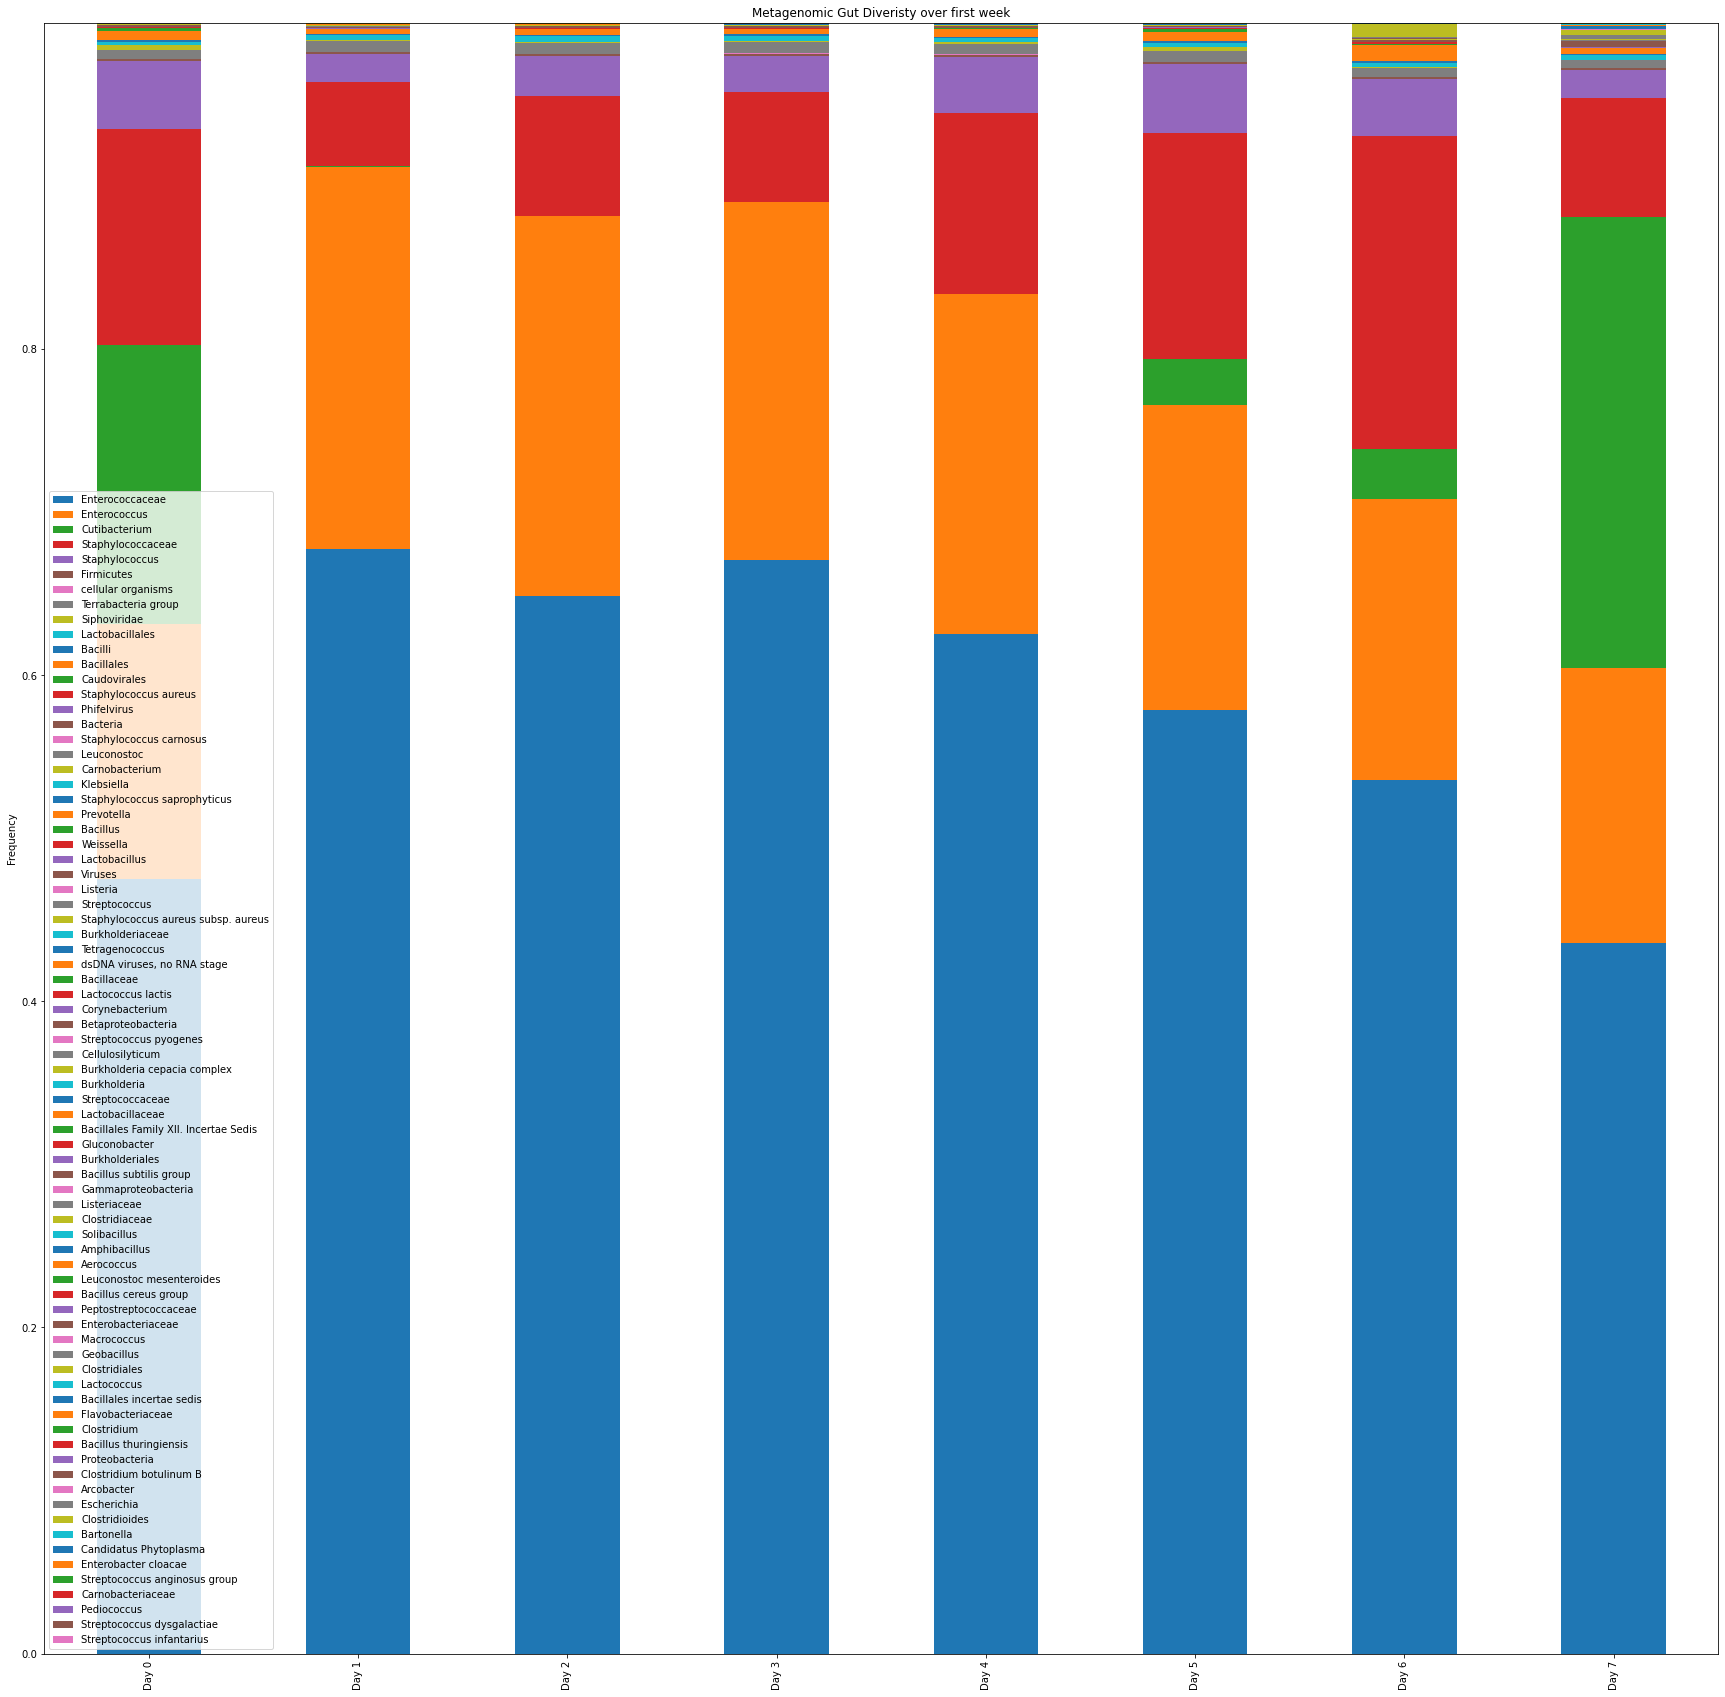

In [75]:
ax=normalized_day.transpose().plot.bar(stacked=True,figsize=(30,30))
plt.legend(loc='lower left')
ax.set_ylabel("Frequency")
ax.set_title("Metagenomic Gut Diveristy over first week")
ax.figure.savefig("Step1_barplot.png")

## Question 1

After the first day, diversity increases with reduced Enterococcaceae and Enterococcus representation, and increased Staphylococcaceae and Cutibacterium representation. 

## Question 2

Contigs can be grouped by codon usage, GC content, or local sequence similarity to known taxa. 

## Question 3

A) We have 6 bins. 
B) The file sizes for all 6 bins add up to 13.1 Mb, and the assembly is 38.9 Mb. 13.1/38.9 = 0.35 or 35% of the assembly represented by the bins. 
C) Yes. Prokaryotic genome size ranges from 500 kb to about 12 Mb, and the bin sizes around 2-3 MB. 
D) Genome scale sequence comparison of the bins to reference with LAST 

# Step 3: Estimate taxonomy of your putative genomes 

See week13.sh for bash script to do crossreferencing bin scaffolds and KRAKEN

## Question 4:

A) Bin 1: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus haemolyticus;Staphylococcus haemolyticus JCSC1435

Bin 2: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Leuconostoc;Leuconostoc citreum;Leuconostoc citreum KM20

Bin 3: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus lugdunensis;Staphylococcus lugdunensis HKU09-01

Bin 4: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;Enterococcus faecalis;Enterococcus faecalis OG1RF

Bin 5: Bacteria;Terrabacteria group;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Cutibacterium;Cutibacterium avidum;Cutibacterium avidum 44067

Bin 6: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus epidermidis;Staphylococcus epidermidis RP62A

Bin 7: Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus aureus;Staphylococcus aureus subsp. aureus;Staphylococcus aureus subsp. aureus ST72;Staphylococcus aureus subsp. aureus CN1

Bin 8: Bacteria;Terrabacteria group;Firmicutes;Tissierellia;Tissierellales;Peptoniphilaceae;Anaerococcus;Anaerococcus prevotii;Anaerococcus prevotii DSM 20548

B) Kallisto is an alternative approach that would provide a more quantitative and robust method. Kallisto perform k-mer psuedo-allignment, and after mapping to a genome, infers strain abundances using an expectation-maximization algorithm

# Step 4: Make a heatmap of the individual bin abundances over time

In [60]:
abundance_df=pd.read_csv("abundance_table.tab",delimiter='\t')

abundance_df = abundance_df[["Genomic bins","SRR492183","SRR492185",
"SRR492186","SRR492188","SRR492190","SRR492193","SRR492194","SRR492197"]]

species=["Staphylococcus haemolyticus","Enterococcus faecalis","Leuconostoc citreum",
                   "Cutibacterium avidum","Staphylococcus epidermidis","Staphylococcus aureus",
                   "Anaerococcus prevotii","Staphylococcus lugdunensis"]

abundance_df["Genomic bins"]=species
new_df = abundance_df.set_index("Genomic bins")
new_df.columns=['Day 0','Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']
new_df

,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,175.127948,167.273691,102.432386,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9219.720953,9348.741359,8139.870719,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,9.170054,8.887730,5.838109,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.747395,0.552469,0.875860,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,850.342196,820.872805,1033.761424,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,2.312693,1.452063,1.347894,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii,0.186461,0.181546,0.065351,4.223711,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.237916,6.194380,0.475050,0.491073,78.291586,6.639770,10.595311


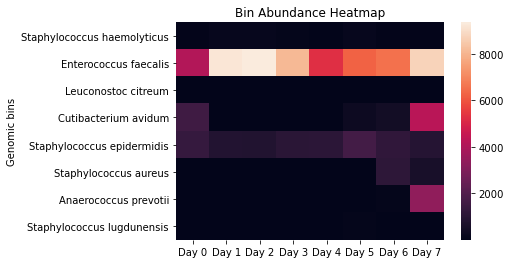

In [63]:
ax = sns.heatmap(new_df)
ax.set_title("Bin Abundance Heatmap")
ax.figure.savefig("Heatmap.png")

## Question 5

Yes, in both figures Enterococcus drastically increases in abundance after the first day and then decays. Inversely, both figures show Cutibacterium and Staphlyococcus decrease in abundance after the first day and then increase over time, with Cutibacterium being more dramatic. However, a notable difference is that the heatmap shows increased abundance on the last day, which is not shown in the barplot. 